In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [2]:
# Load data
df = pd.read_csv("blackbird.csv", header = 0)

In [3]:
# Fill NaN of Sex
for i in range(df.shape[0]):
    if df.iloc[i, :]["Sex"] == np.nan:
        df.iloc[i, :] = df[df["Ring number"] == df.iloc[1, :]["Ring number"]]["Sex"]
    else:
        pass

# Fill NaN of Wing & Weight
df = df.fillna(df.mean(numeric_only = True))

In [4]:
# Data clean
df['Day'] = df['Day'].astype("str")
df['Month'] = df['Month'].astype("str")
df['Year'] = df['Year'].astype("str")
df['Time'] = df['Time'].astype("str")
df["Sex"] = df["Sex"].astype("category")
df["Age"] = df["Age"].astype("category")
df['Time_index'] = df['Year'] + "-" + df['Month'] + "-" + df['Day'] + " " + df["Time"] + ":00:00"
df['Time_index'] = pd.DatetimeIndex(df["Time_index"])
dummies_Sex = pd.get_dummies(df["Sex"], prefix="Sex")
dummies_Age = pd.get_dummies(df["Age"], prefix="Age")
df = pd.concat([df, dummies_Sex, dummies_Age],axis=1)

# Ignore the same bird using Ring number
df_grouped = df.groupby("Ring number").head(1)

In [5]:
# OLS
X = df_grouped.loc[:, ["Sex_F", "Sex_M", "Age_A", "Age_F", "Age_J"]]
y = df_grouped["Wing"]
X_model = sm.add_constant(X)
model = sm.OLS(y, X_model)
results = model.fit()

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wing   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     346.4
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          3.12e-272
Time:                        21:51:09   Log-Likelihood:                -5441.6
No. Observations:                2141   AIC:                         1.090e+04
Df Residuals:                    2135   BIC:                         1.093e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.4525      0.639    204.069      0.000     129.199     131.706
Sex_F         -2.0915      0.369     -5.664      0.000      -2.816      -1.367
Sex_M          2.2263      0.357      6.244      0.000       1.527       2.926
Age_A          1.4096      0.542      2.602      0.009       0.347       2.472
Age_F         -2.2311      0.538     -4.146      0.000      -3.286      -1.176
Age_J         -3.9560      0.569     -6.950      0.000      -5.072      -2.840
==============================================================================
Omnibus:                        9.569   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.200
Skew:                          -0.120   Prob(JB):                      0.00610
Kurtosis:                       3.238   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
df_grouped.groupby("Sex")["Age"].count()

Sex
F     835
M    1198
U     108
Name: Age, dtype: int64

In [8]:
df_grouped.groupby("Age")["Sex"].count()

Age
A     713
F    1063
J     331
U      34
Name: Sex, dtype: int64

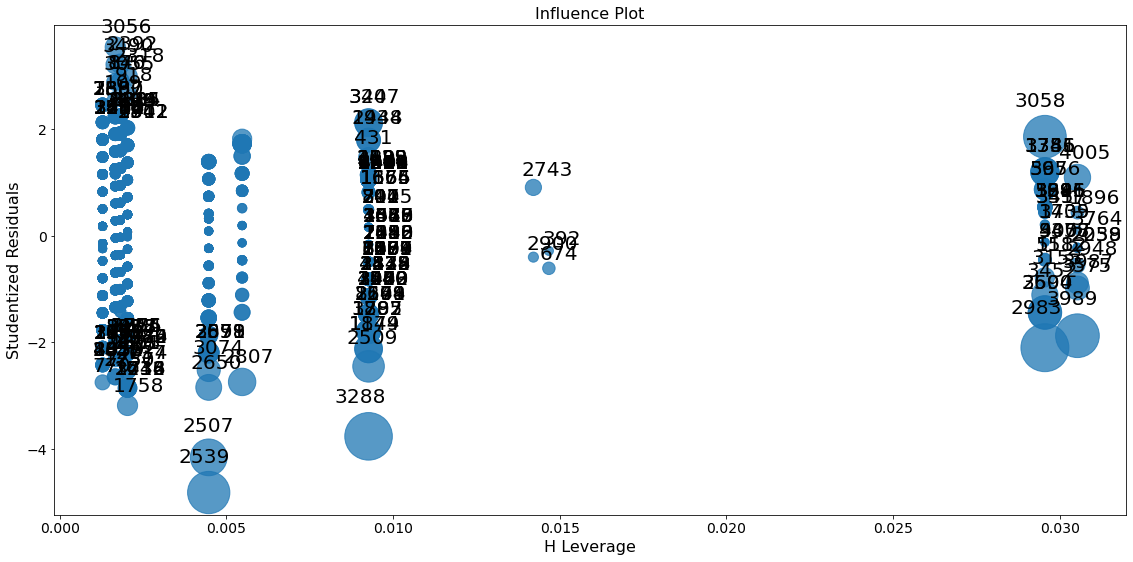

In [9]:
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad=1.0)

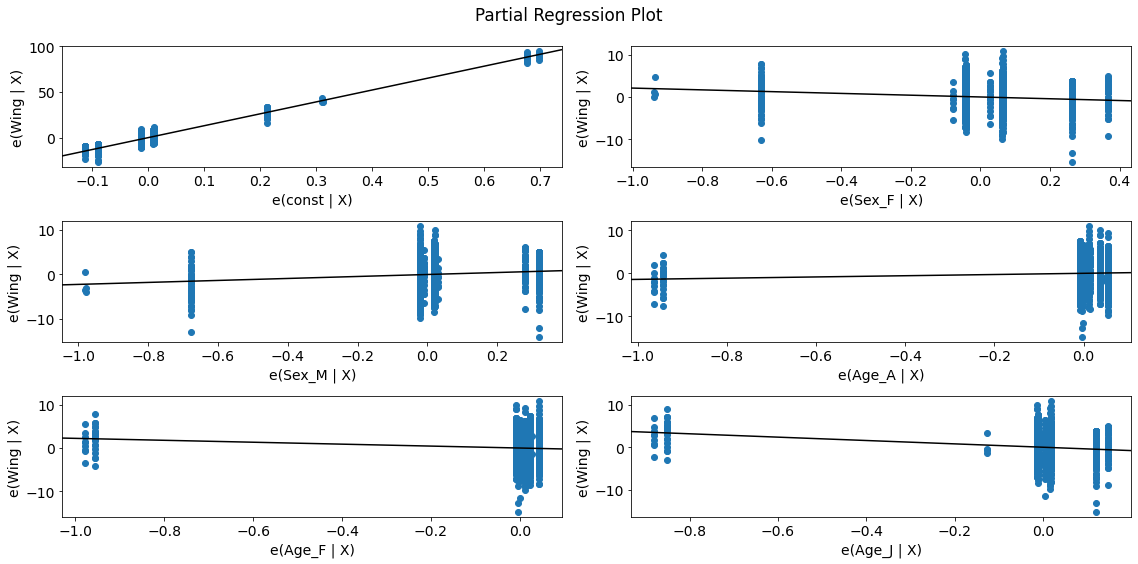

In [10]:
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)

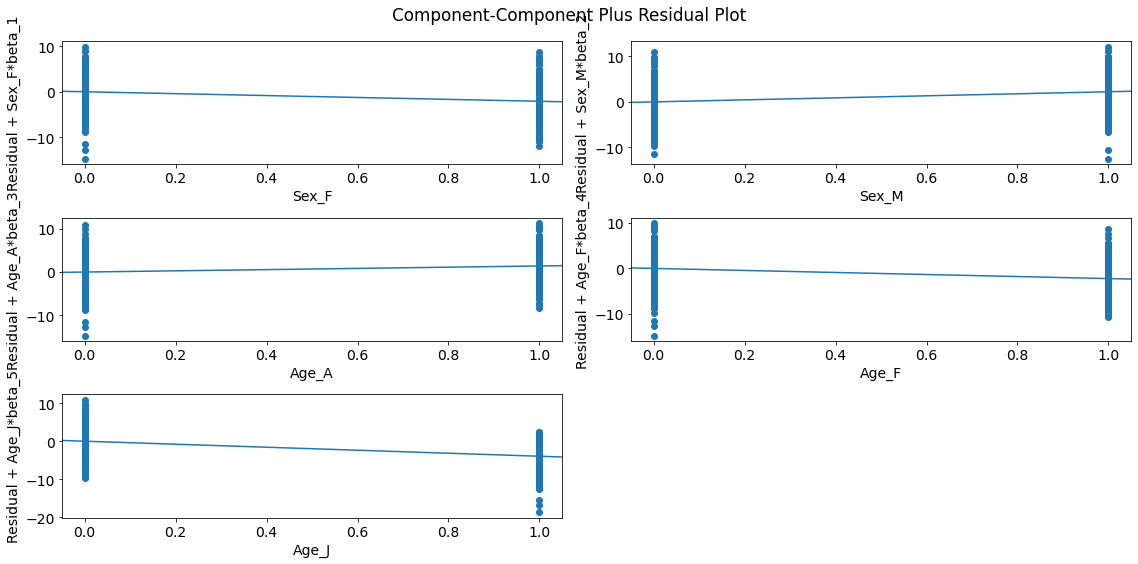

In [11]:
fig = sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

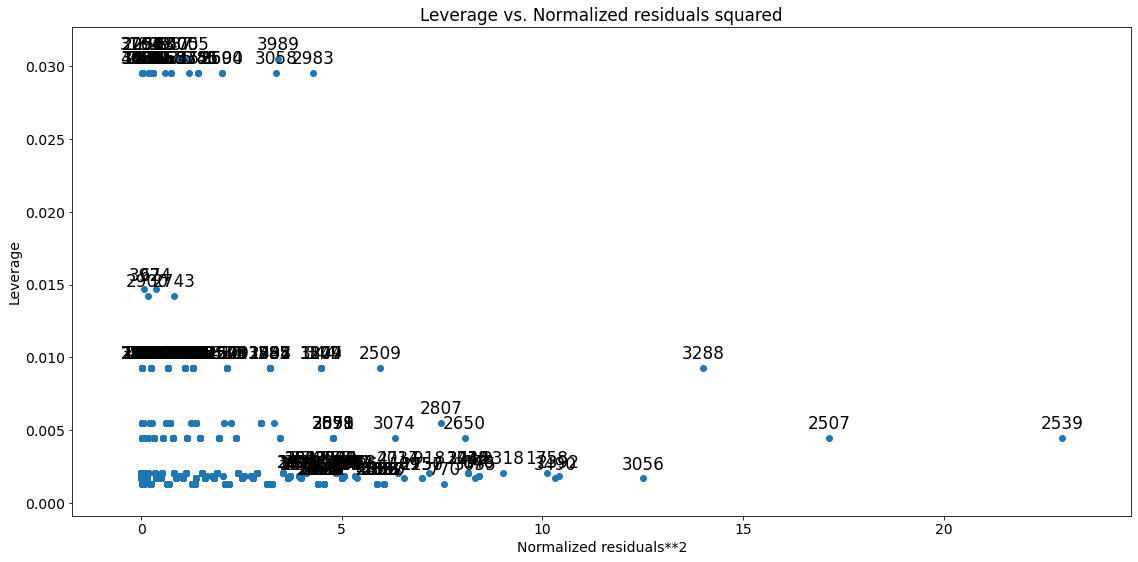

In [12]:
fig = sm.graphics.plot_leverage_resid2(results)
fig.tight_layout(pad=1.0)